# Assignment: Project 1 
# Report on individuals' responses to various surveys in rural NZ

## Instruction

### There are 65,000 anonymised records of individuals' responses to various surveys in rural NZ in this dataset, which is named RURAL_LS_SAMPLE.csv. And there are lots of data about rural lifestyle, individuals' attitudes and occupations. I will clean the dataset and analyse it from the perspective of a real estate developer to find if there are some market opportunities to develop real estate products (e.g. houses, townhouses and apartments) for their protential rural consumers.

## 1. Data Cleaning

### Software Environment

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set(style="ticks")
from pylab import rcParams

rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 5
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20

In [3]:
pd.set_option('html', True)
pd.set_option('max_columns', 20)
pd.set_option('max_rows', 20)

In [4]:
%matplotlib inline

In [5]:
matplotlib.style.use('ggplot')

### Import RURAL_LS_SAMPLE.csv

In [6]:
rls = pd.read_csv("RURAL_LS_SAMPLE.csv")
rls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65000 entries, 0 to 64999
Columns: 187 entries, ID to OTHER_FARMER
dtypes: float64(113), int64(1), object(73)
memory usage: 75.1+ MB


C:\Users\Administrator\Desktop\WinPython-32bit-2.7.10.3\python-2.7.10\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
rls.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            64990, 64991, 64992, 64993, 64994, 64995, 64996, 64997, 64998,
            64999],
           dtype='int64', length=65000)

#### Drop a row when every field is a missing value.

In [8]:
rls.dropna(how='all')

,ID,INT_M_PUB,INT_M_CINEMA,INT_M_THEATRE,INT_M_GYM,INT_M_ENTERTAIN,INT_M_EATOUT,INT_M_WINE,INT_M_CGAME,INT_M_MUSIC,...,DAIRY,HORTICULTURE,OTHER_LIVESTOCK,RETIRED,SHEEP,SMALL_LIFESTYLE_FARMER,TOURISM,OTHER_BUSINESS,OTHER_RESIDENTIAL,OTHER_FARMER
0,1,NaN,1,1,NaN,NaN,NaN,NaN,NaN,1,...,N,N,N,N,N,N,N,N,Y,N
1,2,NaN,1,NaN,NaN,NaN,1,NaN,NaN,NaN,...,N,N,N,Y,N,N,N,N,N,N
2,3,NaN,1,1,NaN,1,1,NaN,NaN,NaN,...,N,N,N,N,N,N,N,N,Y,N
3,4,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,N,N,N,N,Y,N,N,N,N,N
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,N,N,N,N,N,N,N,N,N,N
5,6,1,NaN,1,1,1,1,1,1,1,...,Y,N,N,N,N,N,N,N,N,N
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N,N,N,N,N,N,N,N,Y,N
7,8,NaN,NaN,1,NaN,1,NaN,NaN,NaN,1,...,N,N,N,N,N,Y,N,Y,N,N
8,9,NaN,NaN,NaN,NaN,NaN,1,NaN,1,1,...,N,N,N,N,N,N,N,N,Y,N
9,10,NaN,1,1,1,1,1,1,NaN,1,...,N,N,N,N,N,N,N,N,N,N


#### No row is deleted. Then clean NaN.

In [9]:
rls = rls.fillna(0)
rls.head()

,ID,INT_M_PUB,INT_M_CINEMA,INT_M_THEATRE,INT_M_GYM,INT_M_ENTERTAIN,INT_M_EATOUT,INT_M_WINE,INT_M_CGAME,INT_M_MUSIC,...,DAIRY,HORTICULTURE,OTHER_LIVESTOCK,RETIRED,SHEEP,SMALL_LIFESTYLE_FARMER,TOURISM,OTHER_BUSINESS,OTHER_RESIDENTIAL,OTHER_FARMER
0,1,0,1,1,0,0,0,0,0,1,...,N,N,N,N,N,N,N,N,Y,N
1,2,0,1,0,0,0,1,0,0,0,...,N,N,N,Y,N,N,N,N,N,N
2,3,0,1,1,0,1,1,0,0,0,...,N,N,N,N,N,N,N,N,Y,N
3,4,0,0,0,0,1,0,0,0,0,...,N,N,N,N,Y,N,N,N,N,N
4,5,0,0,0,0,0,0,0,0,1,...,N,N,N,N,N,N,N,N,N,N


#### There are too many columns so I need to choose what I will use.

In [10]:
rls.columns.unique()

array(['ID', 'INT_M_PUB', 'INT_M_CINEMA', 'INT_M_THEATRE', 'INT_M_GYM',
       'INT_M_ENTERTAIN', 'INT_M_EATOUT', 'INT_M_WINE', 'INT_M_CGAME',
       'INT_M_MUSIC', 'INT_M_COOK', 'INT_M_READ', 'INT_M_GARDEN',
       'INT_M_COMPET', 'INT_M_SEW', 'INT_M_CAR', 'INT_M_CLOTHESSHOP',
       'OCCUPATION_MYSELF_MANAGER', 'OCC_P_MGR', 'OCC_M_PROF',
       'OCC_P_PROF', 'OCC_M_SALES', 'OCC_P_SALES', 'OCC_M_ADMIN',
       'OCC_P_ADMIN', 'OCC_M_COMM', 'OCC_P_COMM', 'OCC_M_TRADE',
       'OCC_P_TRADE', 'OCC_M_SEMP', 'OCC_P_SEMP', 'OCC_M_LABOUR',
       'OCC_P_LABOUR', 'OCC_M_MACH', 'OCC_P_MACH', 'OCC_M_HMD',
       'OCC_P_HMD', 'OCC_M_RETIRE', 'OCC_P_RETIRE', 'OCC_M_STUD',
       'OCC_P_STUD', 'OCC_M_UNEMP', 'OCC_P_UNEMP', 'OCC_SELFEMPLOYED_TXT',
       'OCC_SEMP_TXT_OTH', 'ATT_Buy_NZ_productas_Strongly agree',
       'ATT_Buy_NZ_productas_agree', 'ATT_Buy_NZ_productas_no opinion',
       'ATT_NZPROD_Disagree', 'ATT_NZPROD_StronglyDisagree',
       'ATT_ENVIRONMENTALLY_friendly_product_SA', 'ATT_EN

#### After filled 'NaN' with 0, the data in the 'interest' columns which are beginning with 'INT' is good enough for my analysis.

#### The data in the 'occupation' columns beginning with 'OCC' is good too. In the analysis process I will need to check if there is a student in the family, so I add a new column 'STUD_IN_FAMILY'.

In [11]:
rls['STUD_IN_FAMILY']=''
for x in range(0,65000):
    if rls.ix[x,'OCC_M_STUD'] == 0:
        rls.ix[x,'STUD_IN_FAMILY'] = rls.ix[x,'OCC_P_STUD']
    else:
        rls.ix[x,'STUD_IN_FAMILY'] = rls.ix[x,'OCC_M_STUD']
rls['STUD_IN_FAMILY']       

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        0
9        0
        ..
64990    0
64991    0
64992    0
64993    0
64994    0
64995    0
64996    0
64997    0
64998    0
64999    0
Name: STUD_IN_FAMILY, dtype: object

#### In the 'attitudes' columns beginning with 'ATT', I find some useful data. Firstly, I will calculate the attitudes of 'Buy_NZ_productas', so I add a new column 'ATT_Buy_NZ_productas': SA=5, A=4, NO=3, D=2, SD=1, Unknow=0

In [12]:
rls['ATT_Buy_NZ_productas']=''
for x in range(0,65000):
    rls.ix[x,'ATT_Buy_NZ_productas']=rls.ix[x,'ATT_Buy_NZ_productas_Strongly agree']*5+rls.ix[x,'ATT_Buy_NZ_productas_agree']*4+rls.ix[x,'ATT_Buy_NZ_productas_no opinion']*3+rls.ix[x,'ATT_NZPROD_Disagree']*2+rls.ix[x,'ATT_NZPROD_StronglyDisagree']*1
rls['ATT_Buy_NZ_productas']

0        5
1        4
2        4
3        5
4        4
5        4
6        0
7        4
8        5
9        3
        ..
64990    3
64991    4
64992    3
64993    4
64994    4
64995    4
64996    5
64997    4
64998    4
64999    4
Name: ATT_Buy_NZ_productas, dtype: object

#### The data in the 'ATT' columns is very useful in the analysis process. But there are a lot of attitudes on 14 different things. Calculating the attitudes one by one like 'Buy_NZ_productas' above looks not clever, so I try to use Apply() to make it.

In [13]:
attitudes_theother = rls.ix[:,'ATT_ENVIRONMENTALLY_friendly_product_SA':'ATT_VOTEELEC_SD']
sa=[]
_a=[]
no=[]
_d=[]
sd=[]
for x in attitudes_theother.columns:
    if x.lower()[-2:]=='sa':
        sa.append(x)
    else:
        if x.lower()[-2:]=='_a':
            _a.append(x)
        else:
            if x.lower()[-2:]=='no':
                no.append(x)
            else:
                if x.lower()[-2:]=='_d':
                    _d.append(x)
                else:
                    if x.lower()[-2:]=='sd':
                        sd.append(x)
                    else:
                        pass

In [14]:
attitudes_theother[sa]=attitudes_theother[sa].replace(1,5)
attitudes_theother[_a]=attitudes_theother[_a].replace(1,4)
attitudes_theother[no]=attitudes_theother[no].replace(1,3)
attitudes_theother[_d]=attitudes_theother[_d].replace(1,2)
attitudes_theother[sd]=attitudes_theother[sd].replace(1,1)

In [15]:
rls['ATT_ENVIRON']=attitudes_theother[ ['ATT_ENVIRONMENTALLY_friendly_product_SA', 'ATT_ENVIRON_A', 'ATT_ENVIRON_NO', 'ATT_ENVIRON_D', 'ATT_ENVIRON_SD'] ].apply(np.sum, axis=1)
rls['ATT_FASHION']=attitudes_theother[ ['ATT_FASHION_SA', 'ATT_FASHION_A', 'ATT_FASHION_NO', 'ATT_FASHION_D', 'ATT_FASHION_SD'] ].apply(np.sum, axis=1)
rls['ATT_FINCTL']=attitudes_theother[ ['ATT_FINCTL_SA', 'ATT_FINCTL_A', 'ATT_FINCTL_NO', 'ATT_FINCTL_D', 'ATT_FINCTL_SD'] ].apply(np.sum, axis=1)
rls['ATT_FINSEC']=attitudes_theother[ ['ATT_FINSEC_SA', 'ATT_FINSEC_A', 'ATT_FINSEC_NO', 'ATT_FINSEC_D', 'ATT_FINSEC_SD'] ].apply(np.sum, axis=1)
rls['ATT_HEALTHY']=attitudes_theother[ [ 'ATT_HEALTHY_SA', 'ATT_HEALTHY_A', 'ATT_HEALTHY_NO', 'ATT_HEALTHY_D', 'ATT_HEALTHY_SD'] ].apply(np.sum, axis=1)
rls['ATT_HMIDEA']=attitudes_theother[ [ 'ATT_HMIDEA_SA', 'ATT_HMIDEA_A', 'ATT_HMIDEA_NO', 'ATT_HMIDEA_D', 'ATT_HMIDEA_SD'] ].apply(np.sum, axis=1)
rls['ATT_INVRISK']=attitudes_theother[ ['ATT_INVRISK_SA', 'ATT_INVRISK_A', 'ATT_INVRISK_NO', 'ATT_INVRISK_D', 'ATT_INVRISK_SD'] ].apply(np.sum, axis=1)
rls['ATT_LOWFAT']=attitudes_theother[ [ 'ATT_LOWFAT_SA', 'ATT_LOWFAT_A', 'ATT_LOWFAT_NO', 'ATT_LOWFAT_D', 'ATT_LOWFAT_SD'] ].apply(np.sum, axis=1)
rls['ATT_QUALITY']=attitudes_theother[ ['ATT_QUALITY_SA', 'ATT_QUALITY_A', 'ATT_QUALITY_NO', 'ATT_QUALITY_D', 'ATT_QUALITY_SD'] ].apply(np.sum, axis=1)
rls['ATT_SPEC']=attitudes_theother[ [ 'ATT_SPEC_SA', 'ATT_SPEC_A', 'ATT_SPEC_NO', 'ATT_SPEC_D', 'ATT_SPEC_SD'] ].apply(np.sum, axis=1)
rls['ATT_TECHIMP']=attitudes_theother[ ['ATT_TECHIMP_SA', 'ATT_TECHIMP_A', 'ATT_TECHIMP_NO', 'ATT_TECHIMP_D', 'ATT_TECHIMP_SD'] ].apply(np.sum, axis=1)
rls['ATT_VOTEELEC']=attitudes_theother[ [ 'ATT_VOTE ON LOCAL ISSUES_SA', 'ATT_VOTEELEC_A', 'ATT_VOTEELEC_NO', 'ATT_VOTEELEC_D', 'ATT_VOTEELEC_SD'] ].apply(np.sum, axis=1)
rls['ATT_WKBILLS']=attitudes_theother[ ['ATT_WKBILLS_SA', 'ATT_WKBILLS_A', 'ATT_WKBILLS_NO', 'ATT_WKBILLS_D', 'ATT_WKBILLS_SD'] ].apply(np.sum, axis=1)

In [16]:
rls.ix[:,'ATT_Buy_NZ_productas':'ATT_WKBILLS'].T

,0,1,2,3,4,5,6,7,8,9,...,64990,64991,64992,64993,64994,64995,64996,64997,64998,64999
ATT_Buy_NZ_productas,5,4,4,5,4,4,0,4,5,3,...,3,4,3,4,4,4,5,4,4,4
ATT_ENVIRON,4,4,3,0,3,3,0,4,4,3,...,3,4,4,4,4,0,5,5,4,4
ATT_FASHION,3,3,3,0,3,3,0,1,0,3,...,3,2,1,4,1,3,0,3,3,3
ATT_FINCTL,5,2,4,0,4,3,0,4,4,5,...,2,4,3,4,4,5,4,3,4,4
ATT_FINSEC,5,2,4,0,5,2,0,4,2,5,...,2,2,3,4,4,5,4,3,4,3
ATT_HEALTHY,3,3,4,0,4,3,0,3,0,4,...,2,4,1,4,2,3,5,3,2,4
ATT_HMIDEA,3,3,3,0,4,3,0,1,0,3,...,3,2,3,4,2,4,4,3,3,3
ATT_INVRISK,2,4,4,0,5,3,0,2,1,3,...,3,2,3,2,1,3,0,2,3,2
ATT_LOWFAT,3,4,4,0,3,3,0,3,0,4,...,2,5,3,4,4,4,5,3,4,4
ATT_QUALITY,5,4,4,5,3,5,0,2,5,4,...,2,4,4,4,4,5,5,4,2,4


#### For the 'ATT' scores above: SA=5, A=4, NO=3, D=2, SD=1, Unknow=0

#### In the rest columns, the 'supermarket spend in a week' data is also useful.

In [17]:
rls['supermarket spend in a week'].unique()

array(['c. $200 to $300', 'd. $300 to $400', 'b. $100 to $200',
       'g. No Answer', 'a. Up to $100', 'e. $400 to $500', 'f. $500 Plus'], dtype=object)

In [18]:
def clean_up_supermarket_spend(x):
    x = x.replace(x[:3], '')
    x = x.replace('$', '')
    if x == 'No Answer':
        x = np.NaN
    return x

In [19]:
rls['supermarket spend in a week'] = rls[['supermarket spend in a week']].applymap(clean_up_supermarket_spend)
rls['supermarket spend in a week'].unique()

array(['200 to 300', '300 to 400', '100 to 200', nan, 'Up to 100',
       '400 to 500', '500 Plus'], dtype=object)

In [20]:
rls['supermarket spend in a week']=rls['supermarket spend in a week'].fillna(0)

In [21]:
rls['supermarket spend in a week'].unique()

array(['200 to 300', '300 to 400', '100 to 200', 0, 'Up to 100',
       '400 to 500', '500 Plus'], dtype=object)

#### I will use the figures of Contract Start Date,  so I have to make sure all the strings in 'CONTRACT_START_DATE' are converted into datetime datatype.

In [22]:
import datetime
rls['CONTRACT_START_DATE'] = pd.to_datetime(rls['CONTRACT_START_DATE'], format='%Y-%m-%d %H:%M:%S')

#### If we make the Date column the index, some manipulation in the analysis process can be performed more powerful.

In [23]:
rls_date = rls.set_index(['CONTRACT_START_DATE'])
rls_date.head()

,ID,INT_M_PUB,INT_M_CINEMA,INT_M_THEATRE,INT_M_GYM,INT_M_ENTERTAIN,INT_M_EATOUT,INT_M_WINE,INT_M_CGAME,INT_M_MUSIC,...,ATT_FINSEC,ATT_HEALTHY,ATT_HMIDEA,ATT_INVRISK,ATT_LOWFAT,ATT_QUALITY,ATT_SPEC,ATT_TECHIMP,ATT_VOTEELEC,ATT_WKBILLS
CONTRACT_START_DATE,,,,,,,,,,,,,,,,,,,,,
2014-04-08 00:00:00,1,0,1,1,0,0,0,0,0,1,...,5,3,3,2,3,5,4,2,4,2
1992-07-11 00:00:00,2,0,1,0,0,0,1,0,0,0,...,2,3,3,4,4,4,2,2,4,2
2012-02-01 00:00:00,3,0,1,1,0,1,1,0,0,0,...,4,4,3,4,4,4,4,3,4,3
2005-11-14 09:43:10,4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,5,0,0,5,0
1998-02-27 00:00:00,5,0,0,0,0,0,0,0,0,1,...,5,4,4,5,3,3,4,4,4,5


In [24]:
rls_date.sort_index(ascending=True, inplace=True)
rls_date.head()

,ID,INT_M_PUB,INT_M_CINEMA,INT_M_THEATRE,INT_M_GYM,INT_M_ENTERTAIN,INT_M_EATOUT,INT_M_WINE,INT_M_CGAME,INT_M_MUSIC,...,ATT_FINSEC,ATT_HEALTHY,ATT_HMIDEA,ATT_INVRISK,ATT_LOWFAT,ATT_QUALITY,ATT_SPEC,ATT_TECHIMP,ATT_VOTEELEC,ATT_WKBILLS
CONTRACT_START_DATE,,,,,,,,,,,,,,,,,,,,,
1955-03-08,3712,1,1,0,0,1,1,1,0,1,...,4,3,4,2,4,2,5,2,4,3
1969-11-24,16431,0,0,0,1,0,1,1,0,0,...,5,5,3,1,3,4,5,3,5,1
1979-09-23,40429,1,1,1,1,1,1,1,0,1,...,4,4,4,2,2,4,4,2,4,1
1982-06-06,33254,0,0,1,0,1,1,1,0,1,...,4,5,4,2,4,4,5,3,5,4
1983-07-27,62193,0,1,0,0,0,0,0,0,1,...,5,4,4,4,4,3,4,3,4,2


#### I also want to use the figures of Contract End Date, so I check if there is any useful information in 'CONTRACT_END_DATE'.

In [25]:
rls['CONTRACT_END_DATE'].unique()

array([ 0.])

#### So 'CONTRACT_END_DATE' column is useless for my analysis.

## 2. Data Analysis

In [26]:
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'

### INTEREST Analysis

#### Real estate product positioning is the key core in the process of project development. From the data in 'INT' columns, we can analyse the protential consumers' interests in rural NZ. We need to find what they like and what they don't care about.

C:\Users\Administrator\Desktop\WinPython-32bit-2.7.10.3\python-2.7.10\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


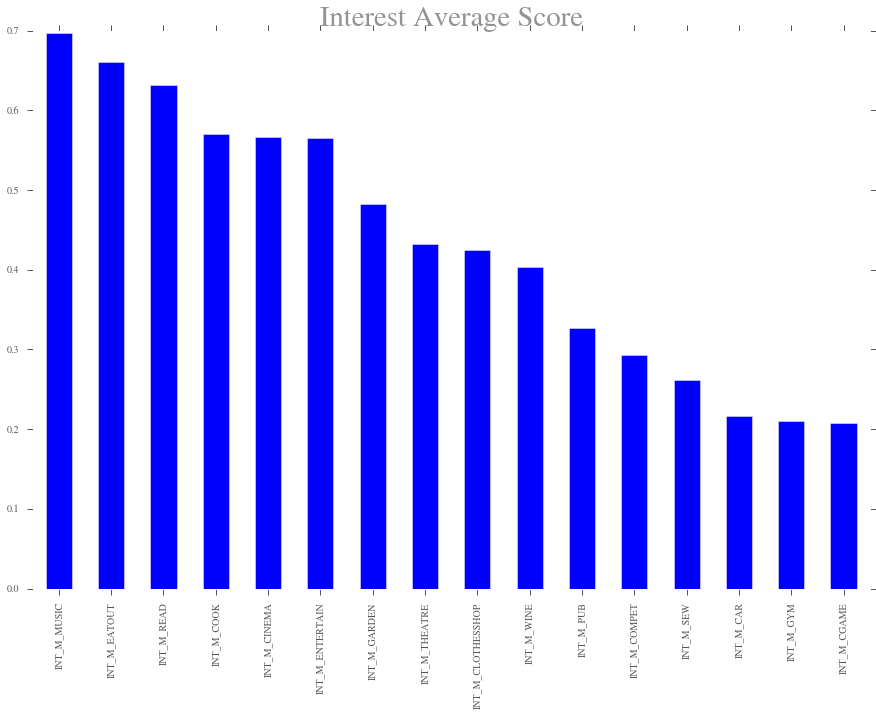

In [27]:
interests = rls.ix[:,'INT_M_PUB':'INT_M_CLOTHESSHOP']
interests.mean().order(ascending=False).plot(kind='bar')
plt.title("Interest Average Score", alpha=0.5)

#### From the bar chart above, it's clear that over 50% rural respondents like MUSIC, EATOUT, READ, COOK, CINEMA and ENTERTAIN, which should be easily enjoyed in the real estate products as much as possible. For example, peaceful area is good for enjoying music and reading, and big kitchen can support the people who like cooking. 
#### And most of interviewees don't care about CAR, GYM and CGAME. That means the real estate developer don't have to build the gym or CGAME room in the rural property. It can save them loads of money, and they can use the money to the entertainment room.

### OCCUPATION Analysis

#### Occupation is one of the most inportant buying behavior factors. We need to know how many respondents work in each certain occupation.

C:\Users\Administrator\Desktop\WinPython-32bit-2.7.10.3\python-2.7.10\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


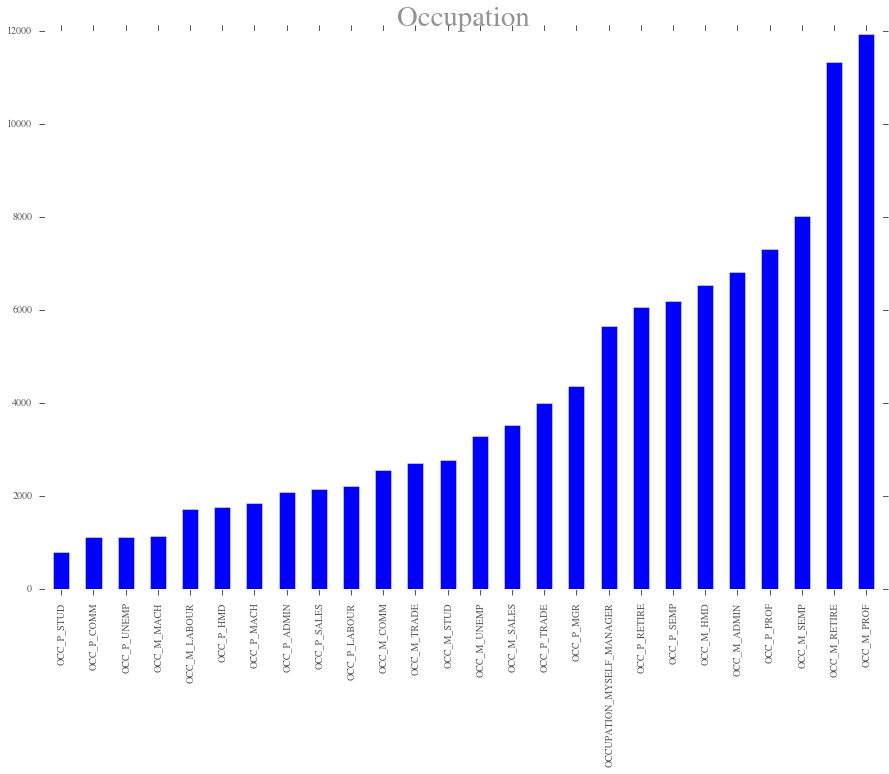

In [28]:
occupations = rls.ix[:, 'OCCUPATION_MYSELF_MANAGER':'OCC_SEMP_TXT_OTH',]
occupations.sum().order(ascending=True).plot(kind='bar')
plt.title("Occupation", alpha=0.5)

#### As we can see from the bar chart above, the most two respondents' occupation are PROF and RETIRE, and the most partner occupation is PROF. We can eaily understand the retired people like to live in the rural area and they are good protential costomers for peaceful houses or apartments.
#### Because students usually can't earn much money when they are studying,  their families' revenue will be reduced to a lower level and may be not good protential consumers. So we will need to check the proportion of these people living in the family with at least one student.

In [29]:
rls['STUD_IN_FAMILY'].sum()/65000

0.050892307692307695

#### So there are only about 5.09% people who live in rural areas are students or have a student partner.

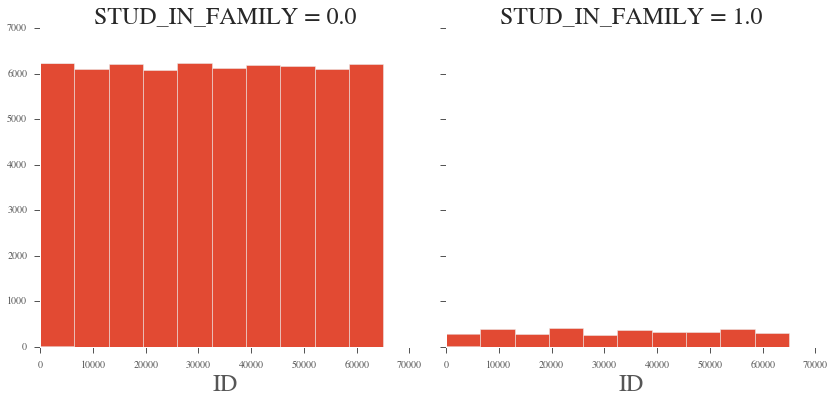

In [30]:
g = sns.FacetGrid(rls, col='STUD_IN_FAMILY', size=6)
g.map(plt.hist, 'ID')

### ATTITUDES Analysis

#### There are a lot of attitudes on 14 different things: SA=5, A=4, NO=3, D=2, SD=1, Unknow=0

In [31]:
attitudes = rls.ix[:,'ATT_Buy_NZ_productas':'ATT_WKBILLS']

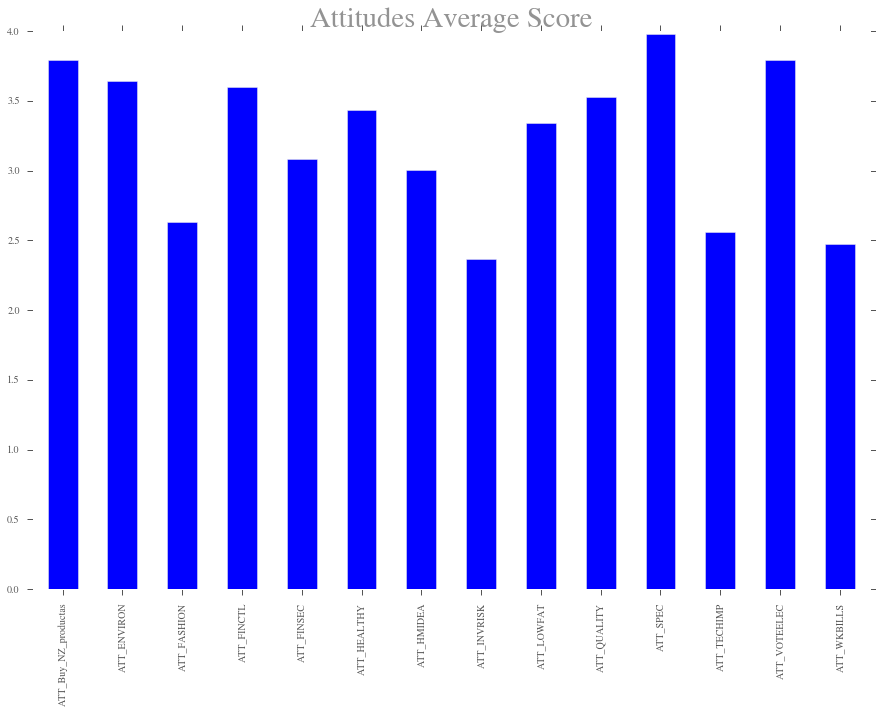

In [32]:
attitudes.mean().plot(kind='bar')
plt.title("Attitudes Average Score", alpha=0.5)

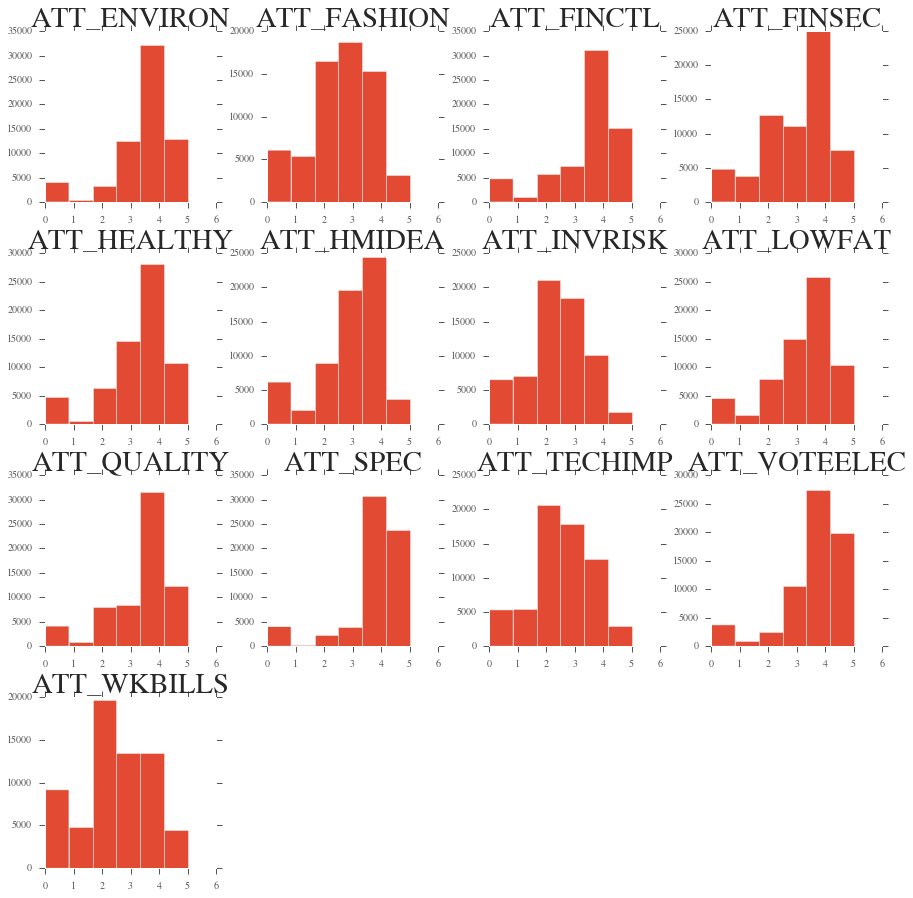

In [33]:
_ = attitudes.hist(bins=6, figsize=(15, 15))

#### In all these 14 things, the attitudes on investment risk is the most important for real estate investment. Now let's look at the relative frequencies of ATT_INVRISK data values.

In [34]:
att_invrisk = rls.ix[:,'ATT_INVRISK']
att_invrisk.describe()

count    65000.000000
mean         2.368954
std          1.233751
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: ATT_INVRISK, dtype: float64

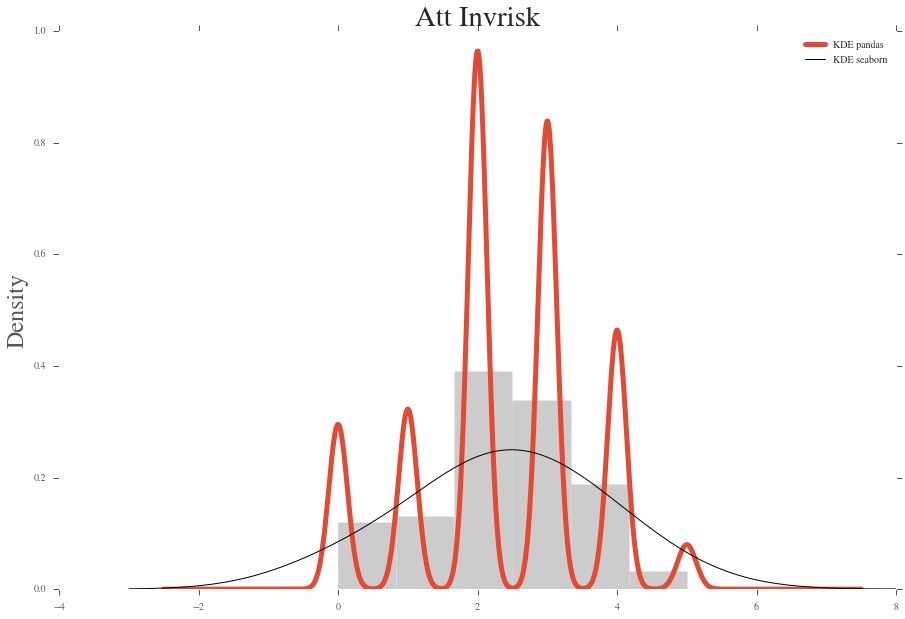

In [35]:
att_invrisk.hist(bins=6, normed=True, alpha=0.4, color='grey')
att_invrisk.plot(kind='kde', title='Att Invrisk', label='KDE pandas')
sns.kdeplot(att_invrisk, bw=1, color='black', lw=1.0, label='KDE seaborn')

#### 'Disagree' is more than the others, which means that usually the interviewees don't like risk in investment. So the real estate products which want to be the investment for these respondents should make them feel worthy and lower risky. 

#### The eye is much better at judging distances than areas. In order to make it clearly, we need to sum up the contributions from all bins in that region by CDF.

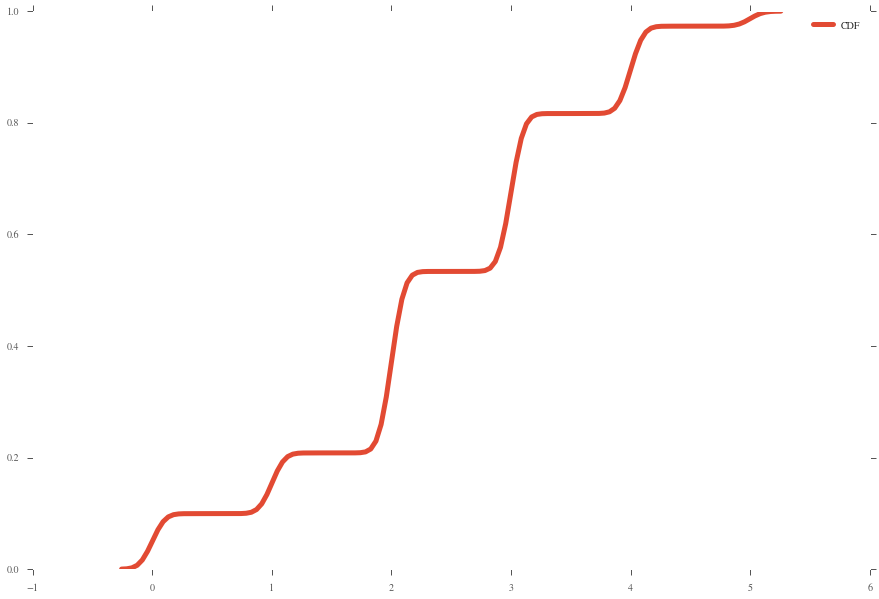

In [36]:
sns.kdeplot(att_invrisk, cumulative=True, label='CDF')

#### Also we can show distribution of the other attitudes by box plots:

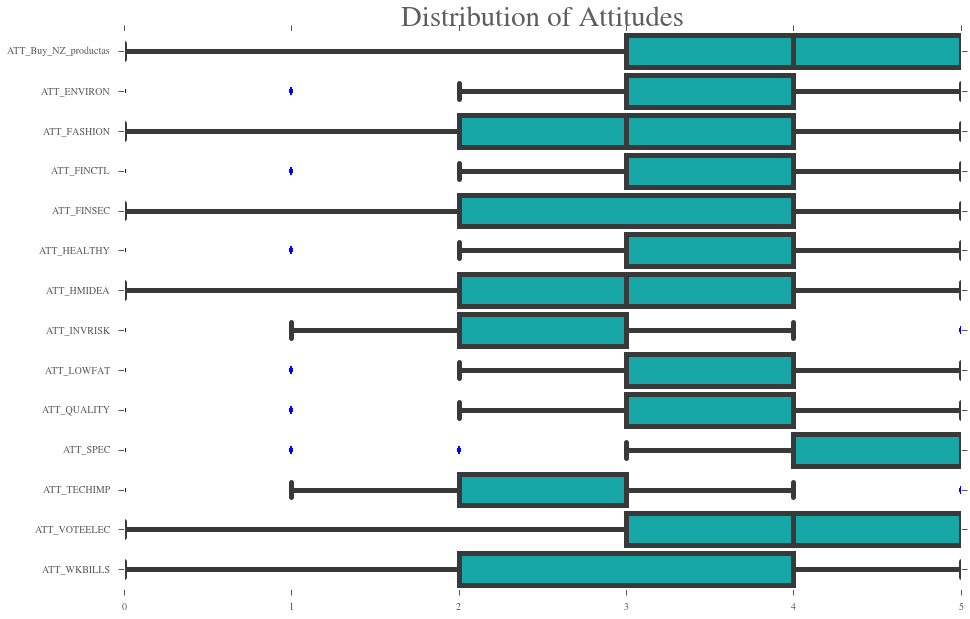

In [37]:
sns.boxplot(data=attitudes, color="c",orient='h')
plt.title('Distribution of Attitudes', alpha=0.75)

### 'RETIRED' Analysis 

#### We all know if the people retired, they can't get income from the job. But maybe they can earn money from their saving or investment. Can they spend money as much as the people who isn't retired? We can check it by 'supermarket spend in a week'.

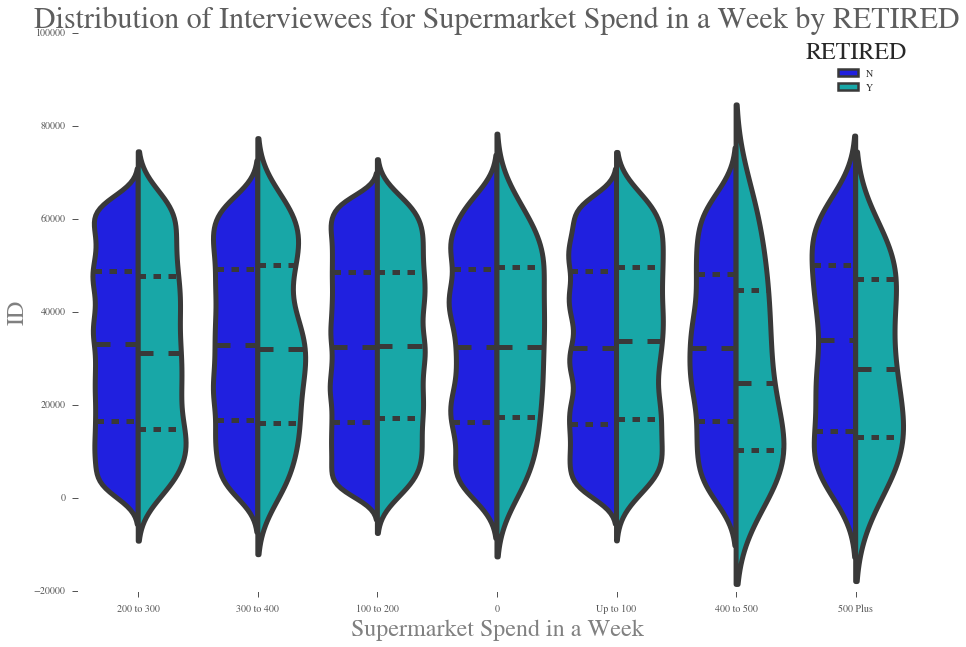

In [38]:
fig, ax = plt.subplots(figsize=(15,10))
rcParams['font.size'] = 20
sns.violinplot(ax=ax, x='supermarket spend in a week', y='ID', hue='RETIRED', data=rls, split=True,
               inner="quart", palette={"Y": "c", "N": "b"})
sns.despine(left=True)
plt.title('Distribution of Interviewees for Supermarket Spend in a Week by RETIRED', alpha=0.75, fontsize=30)
plt.ylabel('ID', alpha=0.75)
plt.xlabel('Supermarket Spend in a Week', alpha=0.75)

#### We can find that there is no obvious gap between retired people and non-retired people in 'supermarket spend in a week'.

## Conclusion

#### The dataset from the real-world domain is really complex, so I just cleaned the data which I used in the analysis part. I tried to analyse the dataset from the perspective of a real estate developer, and found some good advices for them:
#### 1. From 'Interests Analysis' I found that the rural protential consumers like MUSIC, EATOUT, READ, COOK, CINEMA and ENTERTAIN, and property developers should save money on GYM and CGAME in rural real estate products(including houses, townhouses and apartments).
#### 2. From 'Occupation Analysis' I found that the most two respondents' occupation are PROF and RETIRED. The real estate developers should target them as the most protential consumers rather than the sudents' families, which is only around 5% in rural NZ.
#### 3. From 'Attitudes Analysis' I found that rural people in NZ don't like risk in their investment. And most of them agree SPEC, Buy NZ Products and VOTEELEC.
#### 4. From 'RETIRED Analysis' I found that the retired rural people's supermarket spend in a week are still in the same level with non-retired people, which means most retired people's financial conditions are still good enough to be protential consumers for property products.